<a href="https://colab.research.google.com/github/HammadN98/inadimplencia_em_cartoes_de_credito/blob/main/inadimplecia_credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Importacoes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dados = pd.read_csv("https://raw.githubusercontent.com/HammadN98/inadimplencia_em_cartoes_de_credito/refs/heads/main/dados/train.csv")
dados

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,25150,360000,2,2,2,25,-1,-1,-1,-1,...,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,13470,240000,2,1,2,46,2,2,-2,-1,...,2240,1681,2267,0,0,2240,0,2267,3074,0
2,3092,320000,2,2,1,41,0,0,0,0,...,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,13973,50000,2,2,2,24,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4,10567,80000,1,3,1,52,-1,0,0,0,...,20561,21261,21457,1500,1500,1500,1028,876,1449,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,6283,50000,2,2,2,31,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
20996,25589,80000,2,2,1,37,0,0,0,0,...,45458,48679,49895,5000,3000,2000,4000,2000,2000,0
20997,4378,100000,1,1,1,52,1,2,2,2,...,23440,28843,31353,0,3600,0,6000,3000,0,1
20998,8604,90000,2,2,1,47,0,0,0,0,...,28747,29177,29452,2000,2000,2000,2000,2000,2000,0


## 1. Conhecendo os dados

#### Estrurtura dos dados

Id -> Identificador de cada cliente.

LIMIT_BAL -> Valor de credito concedido, inclui valores idividuais e familiar.

SEX -> Genero:
  * 1 = Masc.
  * 2 = Fem.

EDUCATION -> Nivel de escolaridade:
  * 1 = pós-graduação.
  * 2 = universidade.
  * 3 = ensino médio.
  * 4 = outros.
  * 5, 6 = desconhecido.

MARRIAGE -> Estado civil:
  * 1 = pós-graduação.
  * 2 = universidade.
  * 3 = ensino médio.
  * 4 = outros.
  * 5, 6 = desconhecido.

AGE -> Idade do cliente.

PAY_0 -> Status de pagamento, em setembro de 2005:
  * -1 = pagamento em dia.
  * 1 = atraso de 1 mês.
  * 2 = atraso de 2 meses.
  * 9 = atraso de 9 meses ou mais.
  
PAY_2 a PAY_6 -> Status de pagamento (Abril a Agosto):
  * Mesma escala que acima.

BILL_AMT1 a BILL_AMT6 -> Montante da fatura.
  * Dos meses de abril a setembro.

PAY_AMT1 a PAY_AMT6 -> Valor do pagamento anterior
  * Dos meses de abril a setembro.

default_payment_next_month (Variavel alvo) -> Inadimplencia no proximo mes:
  * 1 = sim.
  * 0 = não.



In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          21000 non-null  int64
 1   LIMIT_BAL                   21000 non-null  int64
 2   SEX                         21000 non-null  int64
 3   EDUCATION                   21000 non-null  int64
 4   MARRIAGE                    21000 non-null  int64
 5   AGE                         21000 non-null  int64
 6   PAY_0                       21000 non-null  int64
 7   PAY_2                       21000 non-null  int64
 8   PAY_3                       21000 non-null  int64
 9   PAY_4                       21000 non-null  int64
 10  PAY_5                       21000 non-null  int64
 11  PAY_6                       21000 non-null  int64
 12  BILL_AMT1                   21000 non-null  int64
 13  BILL_AMT2                   21000 non-null  int64
 14  BILL_A

In [5]:
dados.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.00000,21000.000000,21000.000000,21000.00000,...,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,14949.183667,167214.746667,1.607571,1.854190,1.551714,35.461619,-0.01119,-0.127238,-0.164857,-0.21819,...,43387.372476,40398.551095,38931.194000,5686.349333,5.923003e+03,5202.325333,4793.172000,4797.012952,5211.736762,0.221190
std,8632.775153,128965.188482,0.488303,0.791628,0.521176,9.206628,1.12321,1.198957,1.198624,1.17221,...,64081.073110,60396.811177,59196.499234,16868.075695,2.390953e+04,17006.416467,15467.403159,15270.031988,17698.795697,0.415058
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.00000,-2.000000,-2.000000,-2.00000,...,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7508.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.00000,-1.000000,-1.000000,-1.00000,...,2332.000000,1759.000000,1242.750000,998.250000,8.360000e+02,390.000000,284.000000,241.000000,102.000000,0.000000
50%,14939.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.00000,0.000000,0.000000,0.00000,...,19158.500000,18266.500000,17203.500000,2100.000000,2.011000e+03,1811.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22386.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.00000,0.000000,0.000000,0.00000,...,55376.750000,50517.250000,49463.000000,5023.250000,5.000000e+03,4500.000000,4002.250000,4051.000000,4000.000000,0.000000
max,29998.000000,800000.000000,2.000000,6.000000,3.000000,75.000000,8.00000,8.000000,8.000000,8.00000,...,706864.000000,587067.000000,699944.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,417990.000000,528666.000000,1.000000


## 2. Analise Exploratoria

### 2.1 Variavel alvo

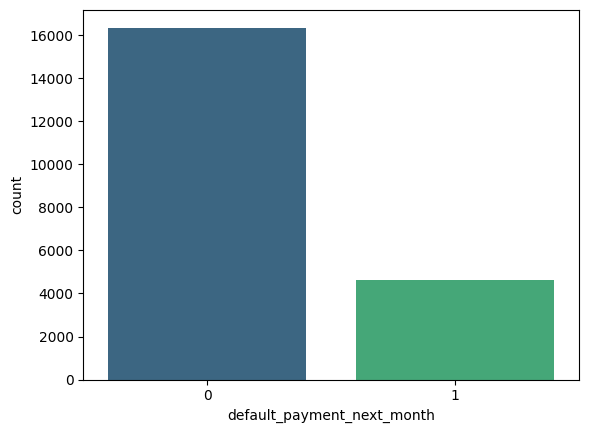

In [16]:
sns.countplot(data=dados, x="default_payment_next_month", palette="viridis", hue="default_payment_next_month", legend=False, );

Classes desbalanceadas. Sera necessario balarcear-las para evitar enviesamento.

#### 2.2 Variaveis Pessoais do clientes

* SEX     
* EDUCATION
* MARRIAGE  
* AGE  

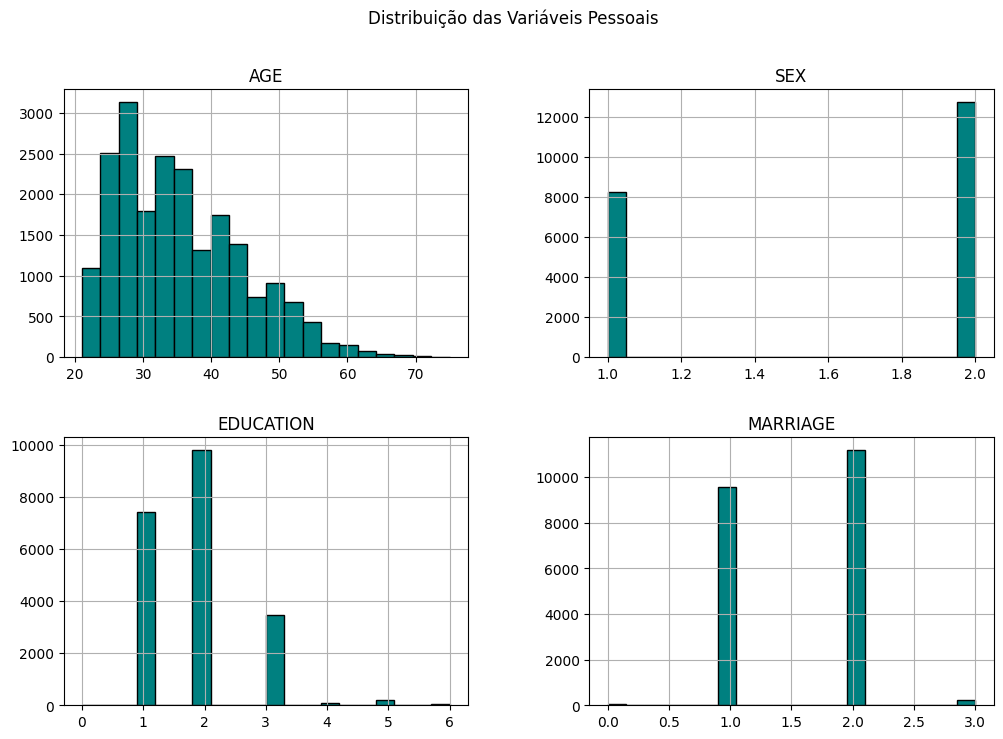

In [22]:
pessoais = ['AGE','SEX', 'EDUCATION', 'MARRIAGE']
dados[pessoais].hist(figsize=(12, 8), bins=20, color='teal', edgecolor='black')
plt.suptitle("Distribuição das Variáveis Pessoais")
plt.show()